In [1]:
import psycopg2
import config as creds
import sqlalchemy
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
user=creds.PGUSER
password=creds.PGPASSWORD
host=creds.PGHOST
port=5432
database=creds.PGDATABASE

In [3]:
engine_str=f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(engine_str)
conn = engine.raw_connection()
print('Connected')
cur = conn.cursor()
print('Cursor created')

Connected
Cursor created


In [4]:
query1='''
SELECT *
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.reportedbuildinggrossfloorarea > 50000
AND b.REPORTINGYEAR = 2018; 
'''

In [5]:
query2='''
SELECT *
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.reportedbuildinggrossfloorarea > 50000
AND b.REPORTINGYEAR = 2019; 
'''

In [6]:
query3='''
SELECT b.kbtu ,b.taxrecordfloorarea ,b.primarypropertytype_selfselect,b.elegas,n.awnd,n.cldd,n.htdd,n.tavg,n.wdf2,n.wdf5
,n.wsf2,n.wsf5,n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.ELEGAS = 'E'
AND b.REPORTINGYEAR = 2018
AND b.YEARBUILT > 0;
'''

In [7]:
query4='''
SELECT b.kbtu ,b.taxrecordfloorarea ,b.primarypropertytype_selfselect,b.elegas,n.awnd,n.cldd,n.htdd,n.tavg,n.wdf2,n.wdf5
,n.wsf2,n.wsf5,n.date 
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.ELEGAS = 'E'
AND b.REPORTINGYEAR = 2019
AND b.YEARBUILT > 0;
'''

In [8]:
df1 = pd.read_sql(query1,conn)
df2 = pd.read_sql(query2,conn)
df3 = pd.read_sql(query3,conn)
df4 = pd.read_sql(query4,conn)

In [9]:
conn.close()

In [10]:
df1.drop(columns=['reportingyear','weatheryear'], inplace=True)
df2.drop(columns=['reportingyear','weatheryear'], inplace=True)

In [11]:
mask1=np.triu(np.ones_like(df1.corr()))
mask2=np.triu(np.ones_like(df2.corr()))
mask3=np.triu(np.ones_like(df3.corr()))
mask4=np.triu(np.ones_like(df4.corr()))

In [12]:
df1.columns

Index(['id', 'pid', 'dcrealpropertyid', 'ward', 'postalcode', 'yearbuilt',
       'reportstatus', 'primarypropertytype_selfselect', 'taxrecordfloorarea',
       'reportedbuildinggrossfloorarea', 'energystarscore', 'month', 'kbtu',
       'elegas', 'id', 'date', 'awnd', 'cldd', 'htdd', 'snow', 'tavg', 'tmax',
       'tmin', 'wdf2', 'wdf5', 'wsf2', 'wsf5', 'month'],
      dtype='object')

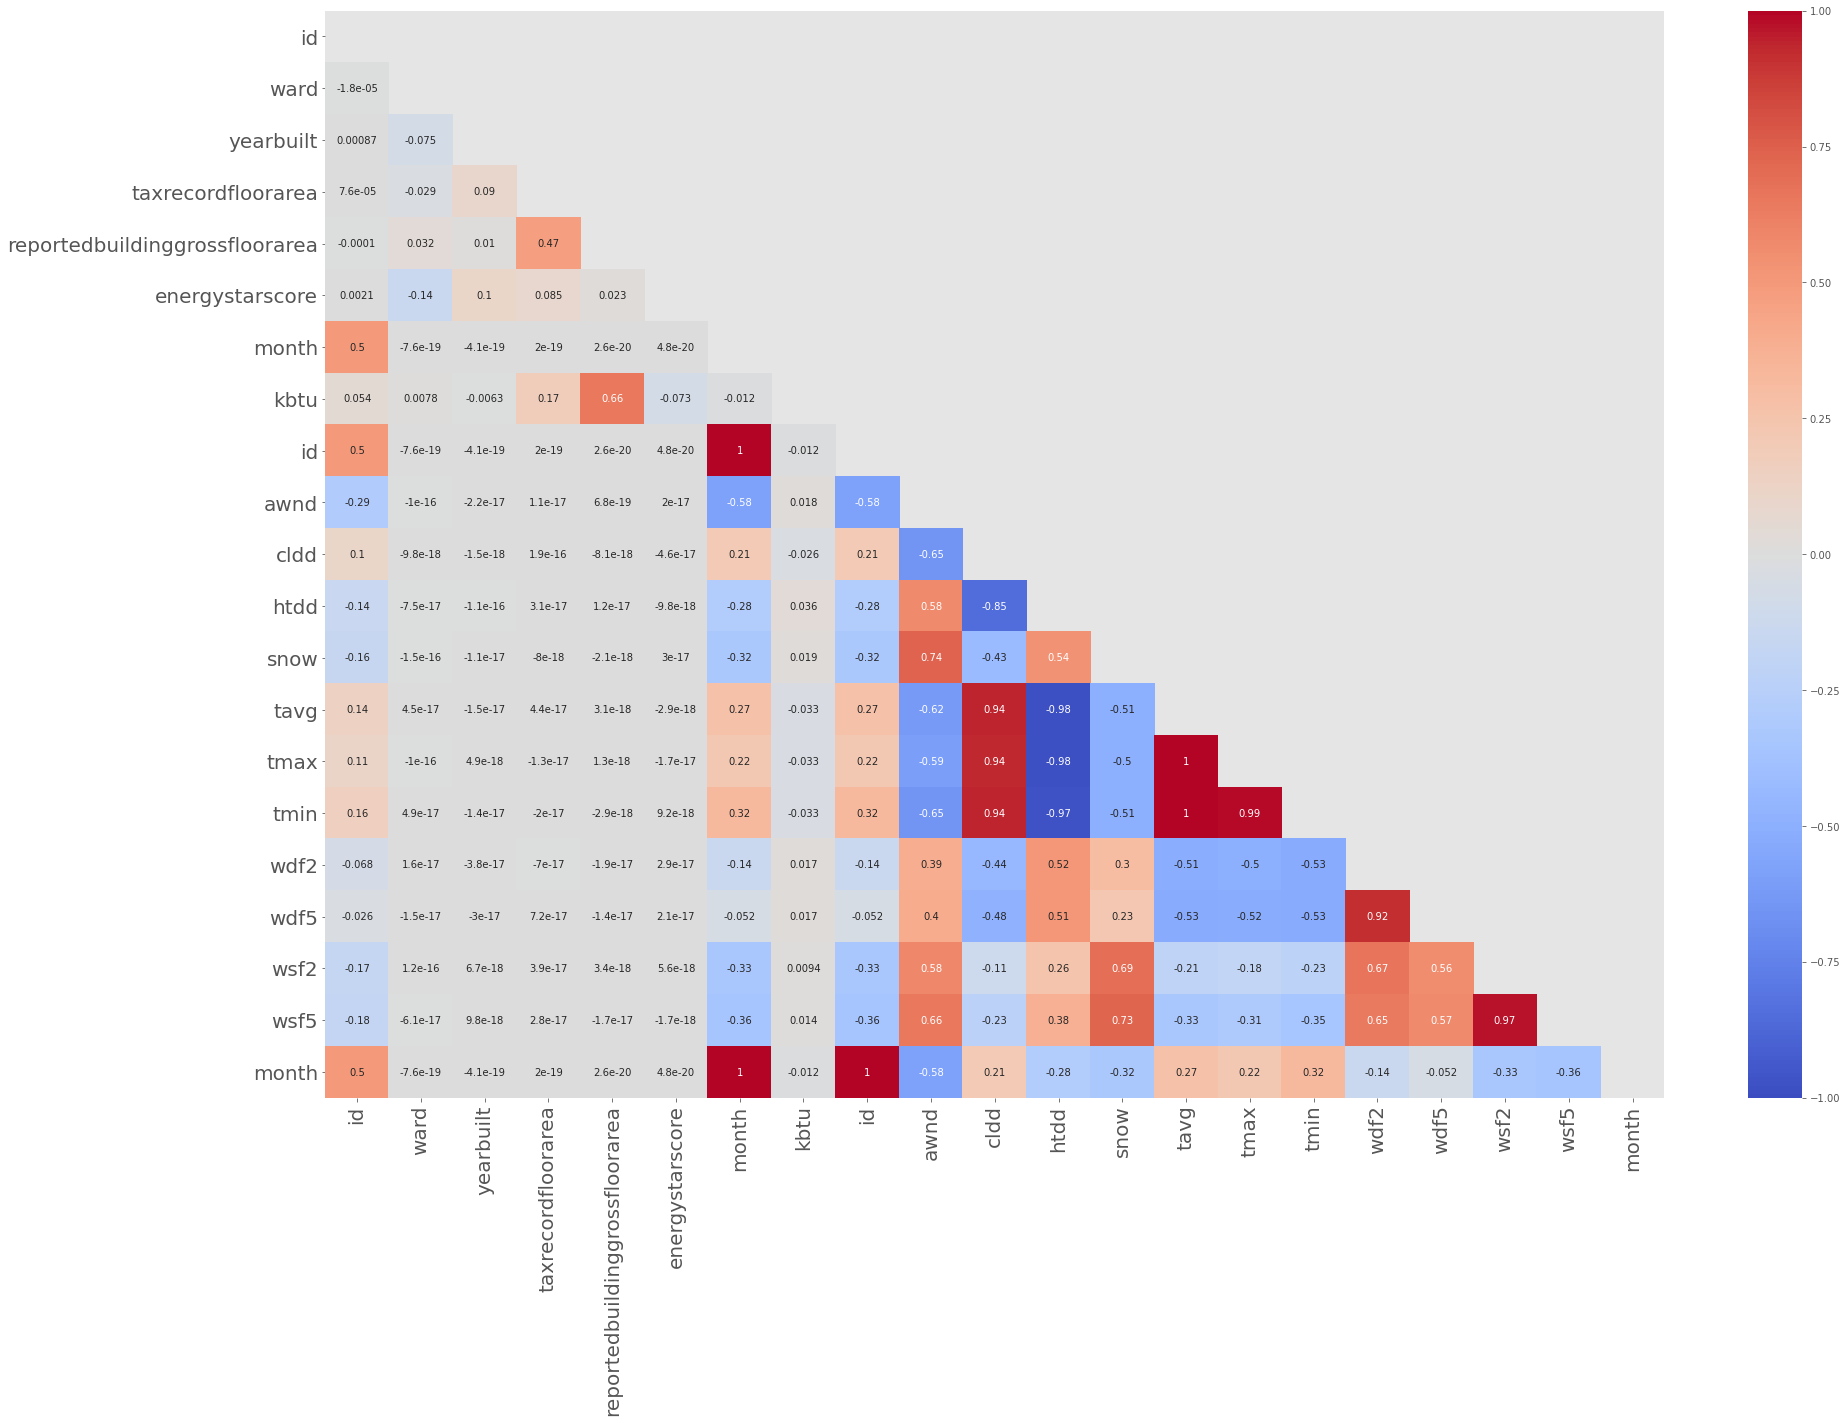

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(30, 20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
heatmap1 = sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True, mask = mask1, cmap="coolwarm");
plt.show()

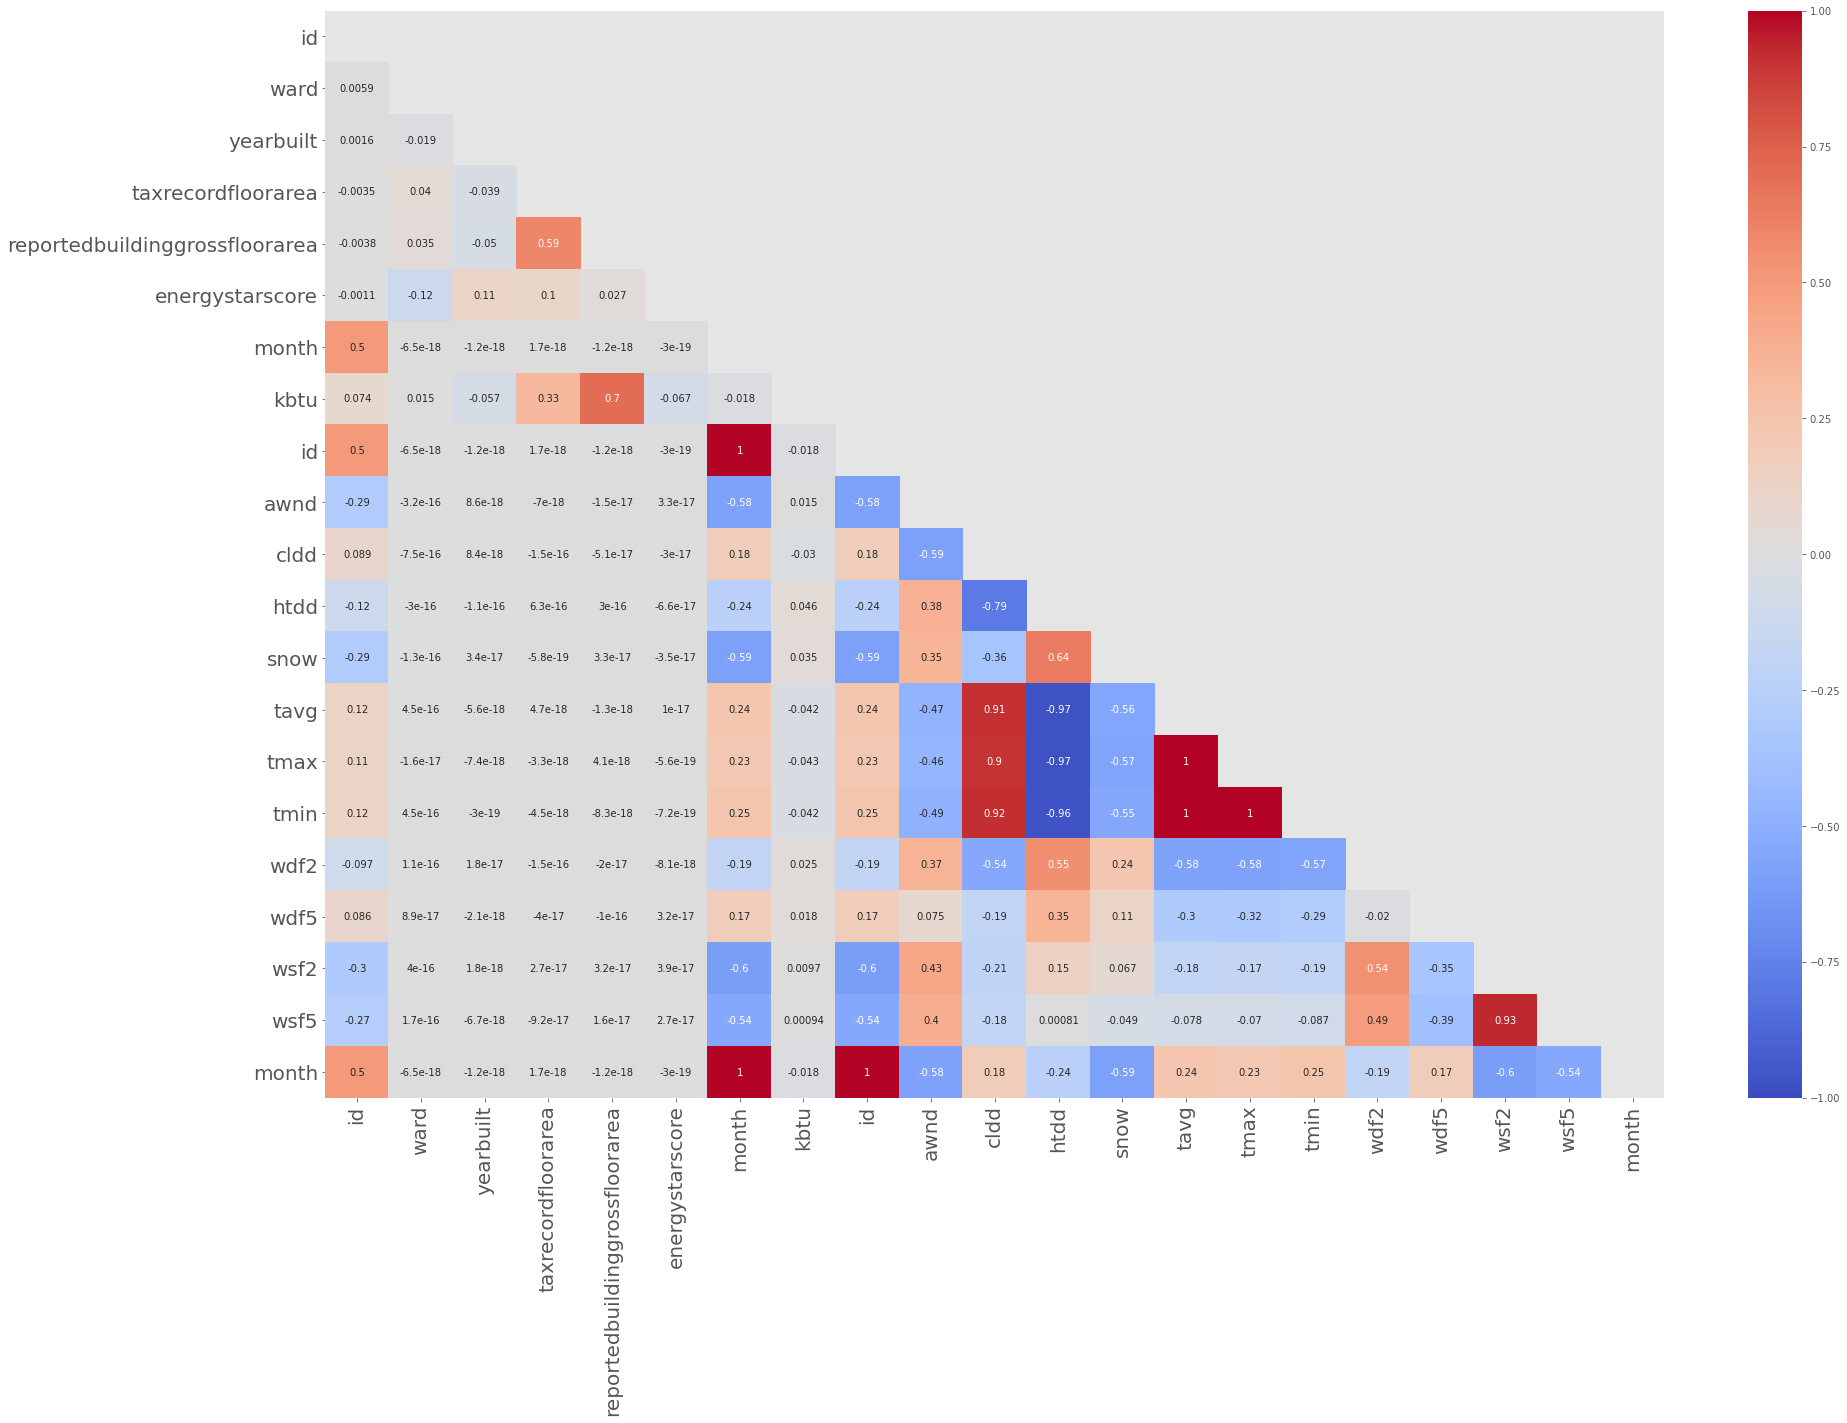

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(30, 20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
heatmap2 = sns.heatmap(df2.corr(),vmin=-1,vmax=1,annot=True, mask = mask2, cmap="coolwarm");
plt.show()

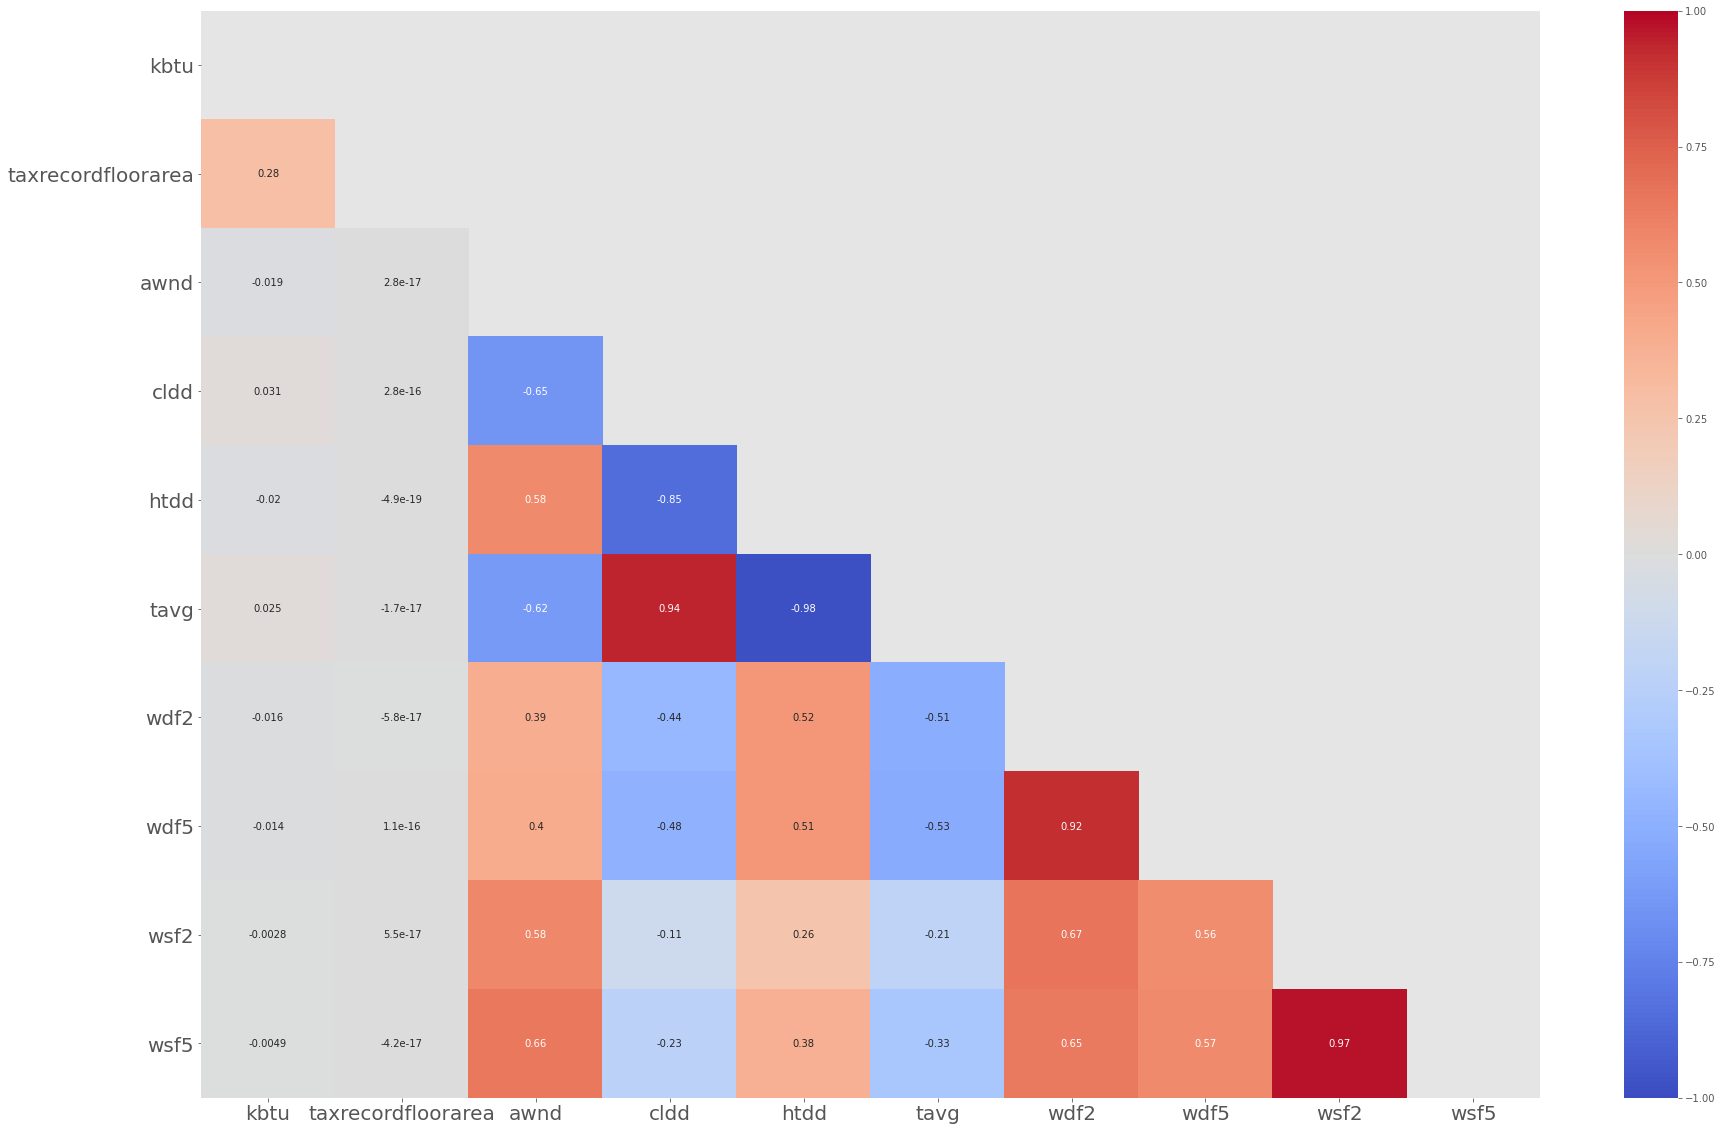

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(30, 20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
heatmap3 = sns.heatmap(df3.corr(),vmin=-1,vmax=1,annot=True, mask = mask3, cmap="coolwarm");
plt.show()

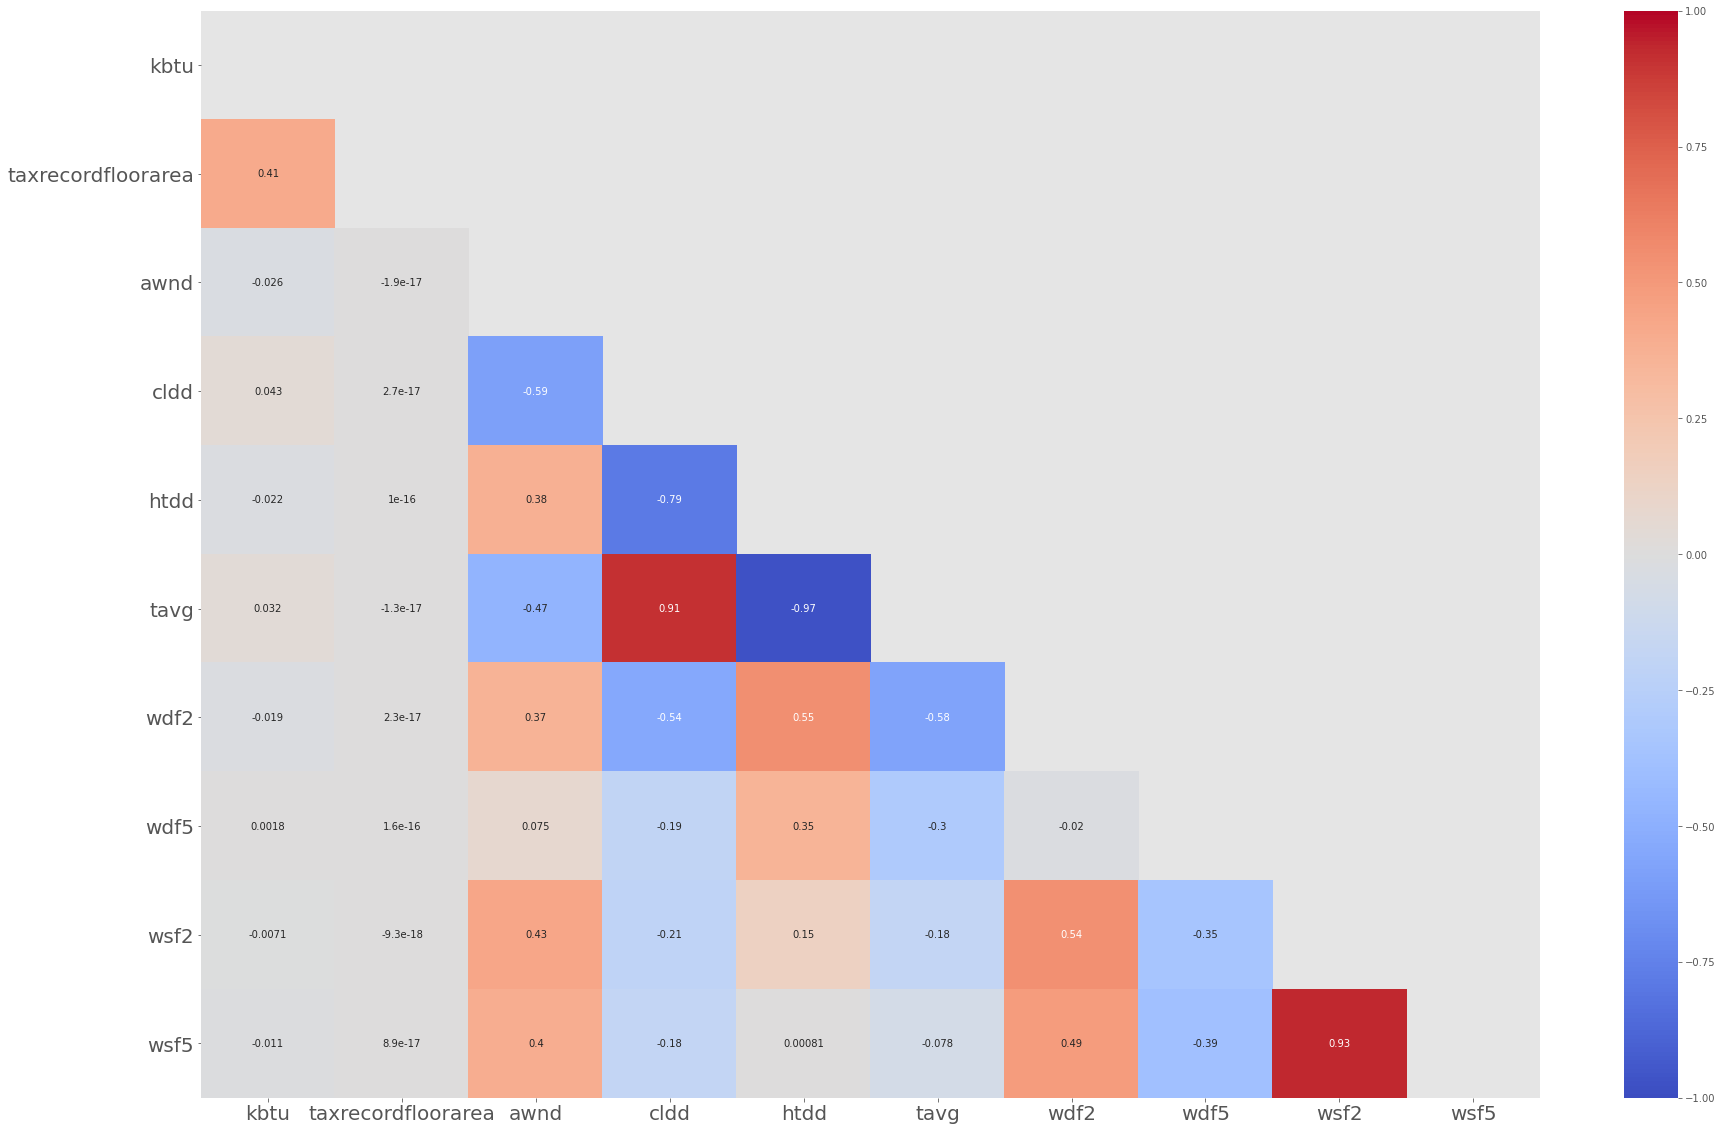

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(30, 20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
heatmap4 = sns.heatmap(df4.corr(),vmin=-1,vmax=1,annot=True, mask = mask4, cmap="coolwarm");
plt.show()

In [17]:
# plt.style.use('ggplot')
# plt.figure(figsize=(30, 20))
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# heatmap1 = sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True, mask = mask1, cmap="coolwarm");
# plt.savefig('Dont_Look/buildingenergyheatmap.png')
# plt.show()